In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Зависимость продажи велосипедов от сезона

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


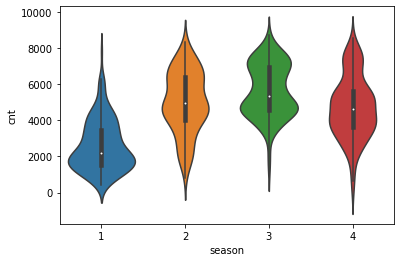

In [4]:
sns.violinplot(data['season'], data['cnt']);

## Матрица коррреляций

<AxesSubplot:>

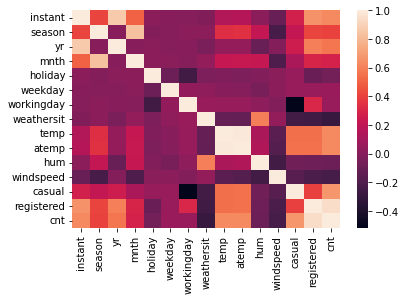

In [5]:
sns.heatmap(data.corr())

## Зависимость целевого признака от остальных

In [6]:
data.shape

(731, 16)

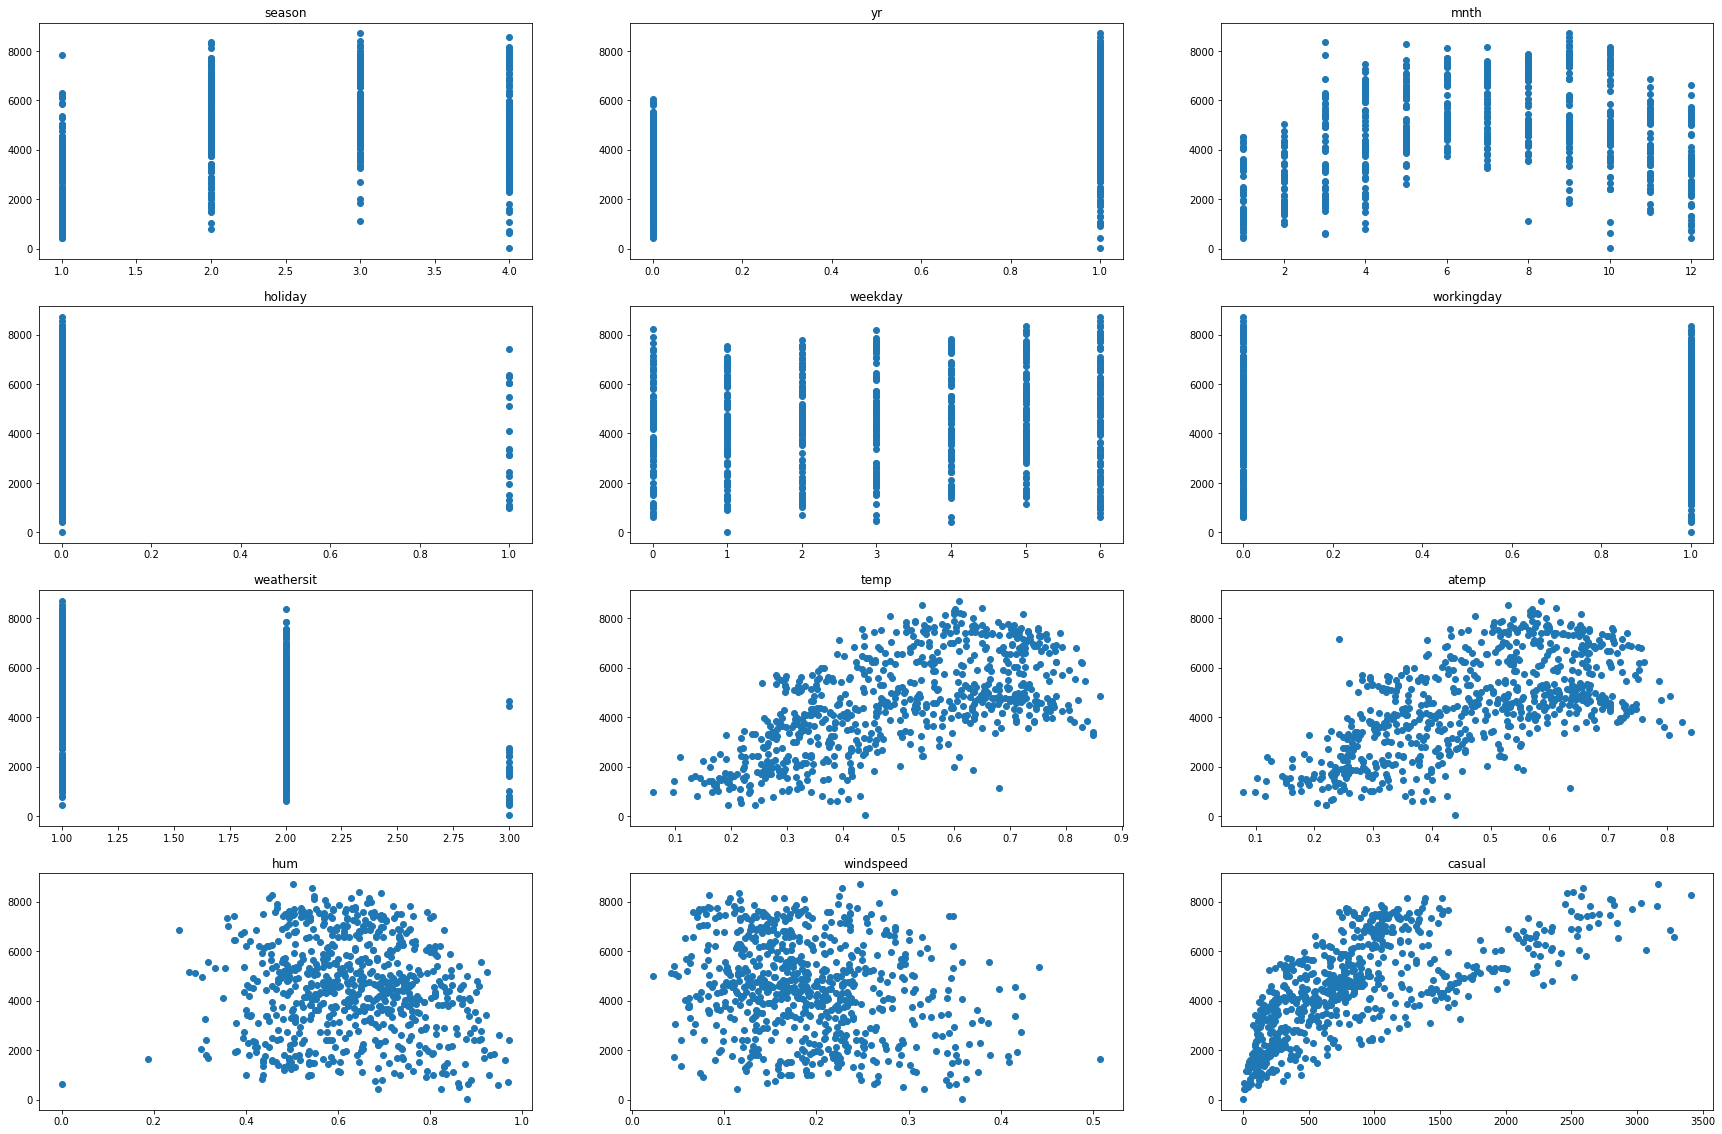

In [8]:
for i, col in enumerate(data.columns[2:-2]):
    plt.subplot(4, 3, i+1) #для множества графиков
    plt.scatter(data[col], data['cnt'])
    plt.title(col)
    plt.rcParams['figure.figsize'] = [30, 20] #размеры графиков

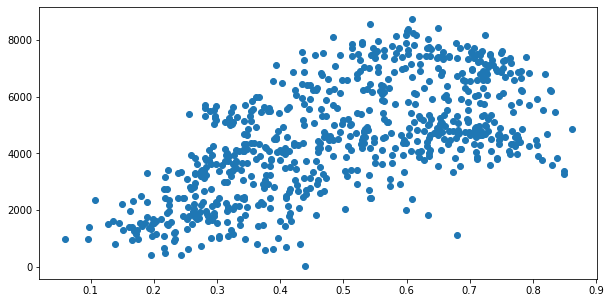

In [10]:
plt.scatter(data['temp'], data['cnt'])
plt.rcParams['figure.figsize'] = [10, 5]

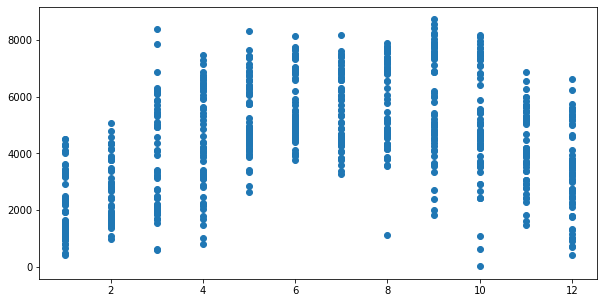

In [11]:
plt.scatter(data['mnth'], data['cnt'])
plt.rcParams['figure.figsize'] = [10, 5]

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler #масштабирует признаки
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [13]:
linreg = LinearRegression()
lasso = Lasso(random_state=13)
ridge = Ridge(random_state=13)
lasso_CV = LassoCV(random_state=13)
ridge_cv = RidgeCV()

## Подготовка данных

In [14]:
X, y = data.drop('cnt', axis=1).drop('instant', axis = 1).drop('dteday', axis=1).drop('registered', axis = 1).drop('casual', axis=1).values, data["cnt"].values

In [15]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

## Масштабируем данные

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [18]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))
#на сколько велосипедов ошибается линейная регрессия

1120.8835610678545

## Распределение целевого признака

<AxesSubplot:>

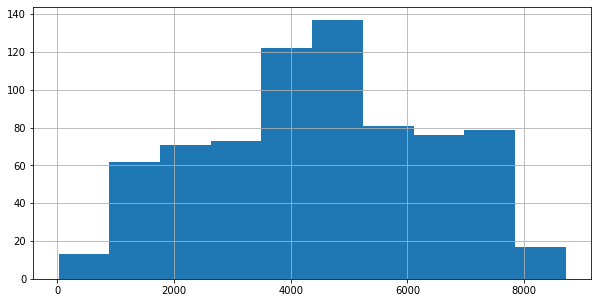

In [20]:
data['cnt'].hist()

## Коэффициенты линейной модели

In [27]:
pd.DataFrame(linreg.coef_, data.columns[2:-3], columns = ['coef']).sort_values(by = 'coef', ascending=False)

,coef
yr,954.509491
atemp,884.945794
season,404.004694
weekday,103.504440
temp,68.805109
mnth,31.073051
workingday,14.936687
holiday,-67.756101
hum,-159.150642
windspeed,-188.234735


In [32]:
def train_validate_report(model, X_train_scaled, X_valid_scaled, y_train, y_valid, feature_names):
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid,
                                     model.predict(X_valid_scaled))))
    print(pd.DataFrame(model.coef_, feature_names, 
                       columns = ['coef']).sort_values(by = 'coef', ascending=False))

In [33]:
train_validate_report(lasso, X_train_scaled, X_valid_scaled,
                      y_train, y_valid, feature_names=data.columns[2:-3])

MSE=1120.721409
                  coef
yr          952.804560
atemp       877.159813
season      403.416439
weekday     102.643044
temp         75.953962
mnth         29.857599
workingday   14.173377
holiday     -67.073435
hum        -157.547615
windspeed  -187.341353
weathersit -293.177257


In [34]:
train_validate_report(lasso_CV, X_train_scaled, X_valid_scaled,
                      y_train, y_valid, feature_names=data.columns[2:-3])

MSE=1120.743661
                  coef
yr          951.135002
atemp       883.344030
season      403.009581
weekday     101.892690
temp         69.238981
mnth         28.608639
workingday   13.478682
holiday     -66.360460
hum        -156.248289
windspeed  -186.267734
weathersit -293.016582


In [35]:
train_validate_report(ridge, X_train_scaled, X_valid_scaled,
                      y_train, y_valid, feature_names=data.columns[2:-3])

MSE=1119.567251
                  coef
yr          954.076993
atemp       731.157486
season      400.133599
temp        220.997378
weekday     103.202006
mnth         34.700231
workingday   15.335348
holiday     -69.048247
hum        -157.618736
windspeed  -191.410271
weathersit -293.954551


In [36]:
train_validate_report(ridge_cv, X_train_scaled, X_valid_scaled,
                      y_train, y_valid, feature_names=data.columns[2:-3])

MSE=1118.959541
                  coef
yr          934.451520
atemp       535.412847
temp        409.558270
season      375.755363
weekday     100.867631
mnth         48.313351
workingday   16.181215
holiday     -70.062948
hum        -154.347605
windspeed  -193.329834
weathersit -291.577090


## Cлучайный лес

In [42]:
def train_validate_report_forest(model, X_train_scaled, X_valid_scaled, y_train, y_valid, feature_names):
    model.fit(X_train_scaled, y_train)
    print("MSE=%f" % np.sqrt(mean_squared_error(y_valid,
                                     model.predict(X_valid_scaled))))
    print(pd.DataFrame(model.feature_importances_, feature_names, 
                       columns = ['Importance']).sort_values(by = 'Importance', ascending=False))

In [47]:
forest = RandomForestRegressor(random_state=13, n_estimators=500)

In [48]:
train_validate_report_forest(forest, X_train, X_valid,
                      y_train, y_valid, feature_names=data.columns[2:-3])
#коэффициенты модели интерпретируются как важность признаков

MSE=1049.339114
            Importance
atemp         0.274866
temp          0.267110
yr            0.200026
hum           0.070285
season        0.062417
windspeed     0.036676
mnth          0.029983
weathersit    0.029212
weekday       0.021475
workingday    0.005000
holiday       0.002950
